# Machine learning techniques for diagnosis of malignant pleural mesothelioma

MPM is a highly aggressive tumor of the serous membranes, which in humans results from exposure to **asbestos** and **asbestiform fibers**.

Overall: 
* around half of people diagnosed with mesothelioma will live at least a year after the diagnosis
* around 10% of people with mesothelioma will live at least 5 years after diagnosis

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mca import MCA # pip install --user mca
# doc: https://github.com/esafak/mca/blob/master/docs/usage.rst

# configuration bibliotheque pour les graphiques
%matplotlib inline 

os.getcwd()

'/Users/romanelgff/Documents/Master/M2/S1/R1/ML/Project'

In [41]:
df = pd.read_excel("mesothelioma_dataset.xlsx")
df.head()

,age,gender,city,asbestos_exp,MM_type,asbestos_exp_dur,diag_method,keep_side,cytology,symptoms_dur,...,pleural_dehydrogenise,pleural_protein,pleural_albumin,pleural_glucose,dead,pleural_effusion,pleural_tomography,pleuralPh,CRP,diagnosis
0,47.0,1,0,1,0.0,20.0,1,0,1,24.0,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,1,0,0,1.0,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,0,1,0,1.0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,1,0,0,3.0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1,1.5,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [5]:
# dimensions
df.shape 

(324, 35)

In [6]:
# nombre total d'éléments
df.size

11340

In [7]:
# noms des colonnes
df.columns

Index(['age', 'gender', 'city', 'asbestos_exp', 'MM_type', 'asbestos_exp_dur',
       'diag_method', 'keep_side', 'cytology', 'symptoms_dur', 'dyspnoea',
       'chest_ache', 'weakness', 'cigarette', 'perf_status', 'white_blood',
       'WBC', 'HGB', 'PLT', 'sedimentation', 'LDH', 'ALP', 'total_protein',
       'albumin', 'glucose', 'pleural_dehydrogenise', 'pleural_protein',
       'pleural_albumin', 'pleural_glucose', 'dead', 'pleural_effusion',
       'pleural_tomography', 'pleuralPh', 'CRP', 'diagnosis'],
      dtype='object')

In [8]:
# types des colonnes
df.dtypes

age                      float64
gender                     int64
city                       int64
asbestos_exp               int64
MM_type                  float64
asbestos_exp_dur         float64
diag_method                int64
keep_side                  int64
cytology                   int64
symptoms_dur             float64
dyspnoea                   int64
chest_ache                 int64
weakness                   int64
cigarette                  int64
perf_status                int64
white_blood              float64
WBC                        int64
HGB                        int64
PLT                      float64
sedimentation            float64
LDH                      float64
ALP                      float64
total_protein            float64
albumin                  float64
glucose                  float64
pleural_dehydrogenise    float64
pleural_protein          float64
pleural_albumin          float64
pleural_glucose          float64
dead                       int64
pleural_ef

* **age**: âge de l'individu 
* **gender**: genre 
* **city**: si l'individu habite en ville
* **asbestos exposure**: exposition à l'amiante, un silicate fibreux d’origine naturelle
* **type of MM**: type de mésothéliomes malins (trois types)
* **duration of asbetos exposure**: durée d'exposition à l'amiante
* **diagnosis method**: méthode/procédé de diagnostic (0 ou 1?)
* **keep side**: ??? garder de côté le patient?
* **cytology**: dépistage par cytologie (= étude des cellules isolées)
* **duration of symptoms**: durée des symptômes
* **dyspnoea**: présence ou non de dyspnée (souffle court)
* **ache on chest**: présence ou non d'une douleur à la poitrine 
* **weakness**: faiblesse ou non de l'indivdu
* **habit of cigarette**: fumeur ou non
* **performance status**: statut de performance??
* **White Blood cell count (WBC)**:
* **haemoglobin (HGB)**:

In [42]:
df["gender"] = pd.Categorical(df["gender"], ordered=False)
df["city"] = pd.Categorical(df["city"], ordered=False)
df["asbestos_exp"] = pd.Categorical(df["asbestos_exp"], ordered=False)
df["MM_type"] = pd.Categorical(df["MM_type"], ordered=False)
df["diag_method"] = pd.Categorical(df["diag_method"], ordered=False)
df["keep_side"] = pd.Categorical(df["keep_side"], ordered=False)
df["cytology"] = pd.Categorical(df["cytology"], ordered=False)
df["dyspnoea"] = pd.Categorical(df["dyspnoea"], ordered=False)
df["chest_ache"] = pd.Categorical(df["chest_ache"], ordered=False)
df["weakness"] = pd.Categorical(df["weakness"], ordered=False)
df["cigarette"] = pd.Categorical(df["cigarette"], ordered=False)
df["perf_status"] = pd.Categorical(df["perf_status"], ordered=False)
df["HGB"] = pd.Categorical(df["HGB"], ordered=False)
df["dead"] = pd.Categorical(df["dead"], ordered=False)
df["pleural_tomography"] = pd.Categorical(df["pleural_tomography"], ordered=False)
df["pleural_effusion"] = pd.Categorical(df["pleural_effusion"], ordered=False)
df["pleuralPh"] = pd.Categorical(df["pleuralPh"], ordered=False)
df["diagnosis"] = pd.Categorical(df["diagnosis"], ordered=False)

In [14]:
pd.crosstab(df["diagnosis"],df["dead"]) # + de healthy (diagnosis=1) qui meurent que de mesotholmia, strange

dead,0,1
diagnosis,,
1,14,214
2,4,92


In [25]:
df["MM_type"].unique()

[0.0, 1.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]

In [44]:
df["pleuralPh"].unique()

[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]

In [29]:
df["keep_side"].unique() # ??? qu'est-ce?

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [33]:
df["diag_method"].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [35]:
df["cytology"].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [45]:
# mis en place indicatrices au cas où, pour que la fonction MCA repère bien les variables catégorielles
dc = pd.DataFrame(pd.get_dummies(df.drop('diagnosis', axis=1)))
dc.head()

,age,asbestos_exp_dur,symptoms_dur,white_blood,WBC,PLT,sedimentation,LDH,ALP,total_protein,...,HGB_0,HGB_1,dead_0,dead_1,pleural_effusion_0.0,pleural_effusion_1.0,pleural_tomography_0.0,pleural_tomography_1.0,pleuralPh_0.0,pleuralPh_1.0
0,47.0,20.0,24.0,8050.0,9,274.0,60.0,258.0,65.0,7.0,...,0,1,0,1,1,0,1,0,1,0
1,55.0,45.0,1.0,11200.0,7,615.0,86.0,531.0,97.0,5.4,...,1,0,0,1,0,1,0,1,0,1
2,29.0,23.0,1.0,5300.0,12,189.0,30.0,203.0,72.0,7.0,...,0,1,0,1,1,0,1,0,1,0
3,39.0,10.0,3.0,7910.0,14,462.0,28.0,197.0,50.0,8.0,...,0,1,0,1,0,1,1,0,1,0
4,47.0,10.0,1.5,9120.0,4,530.0,71.0,181.0,60.0,6.2,...,1,0,0,1,0,1,1,0,1,0


In [46]:
mca_res = MCA(dc, benzecri=False) # disabling benzecri correction 
print(mca_res.L) # eigenvalues of the factors
print(mca_res.inertia, sum(mca_res.L)) # inertia

[0.04639127 0.01652515 0.00655696 0.00449344 0.00142191 0.00115385
 0.00098095 0.00082999 0.00056077 0.00042685 0.0002774  0.00019049
 0.00018082 0.00014552 0.00014411 0.00013765 0.00012931 0.00012241
 0.00010968 0.0001055  0.00010228 0.00010091]
0.08226755506886388 0.0810872043388823


In [47]:
data = {'Iλ': pd.Series(mca_res.L)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2.head() # NUL

,Iλ
Factor,
1,0.046391
2,0.016525
3,0.006557
4,0.004493
5,0.001422


In [48]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn import preprocessing

In [49]:
# essayons une ACP...
X = df.select_dtypes(include='number')
scaler = preprocessing.StandardScaler().fit(X) # creation d'un scaler

X_scaled = pd.DataFrame(scaler.transform(X)) # scaling X
Y = df["diagnosis"]
X_scaled.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.704904,-0.621441,3.939513,-0.408502,-0.167178,-0.420994,-0.492093,-0.275420,-0.033224,0.502317,-0.159627,-0.192962,-0.428559,-2.503893,-2.272308,1.123760,-1.334180
1,0.023319,0.903452,-0.943190,0.505760,-0.765693,1.079865,0.705305,1.201391,0.880472,-1.428726,-1.106574,-0.427312,13.115167,-1.486454,-1.397032,-1.561005,-0.980617
2,-2.343406,-0.438454,-0.943190,-1.206667,0.730595,-0.795108,-1.873705,-0.572947,0.166647,0.502317,0.313847,-0.505429,-0.071850,-2.503893,-2.272308,1.528314,-0.936422
3,-1.433127,-1.231399,-0.518607,-0.449136,1.329110,0.406459,-1.965813,-0.605404,-0.461519,1.709219,1.892092,-0.505429,-0.111069,0.675604,0.791159,-0.126678,-1.908719
4,-0.704904,-1.231399,-0.837044,-0.097943,-1.663465,0.705750,0.014498,-0.691957,-0.175989,-0.463204,0.787320,-0.765819,-0.570495,-0.214655,-0.138822,0.167542,-2.350672


In [50]:
n_components = 6

# IPCA
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X_scaled)

#PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

sum(pca.explained_variance_ratio_) # sum of the % of variance explained by earch of the selected components

0.5634605521929321

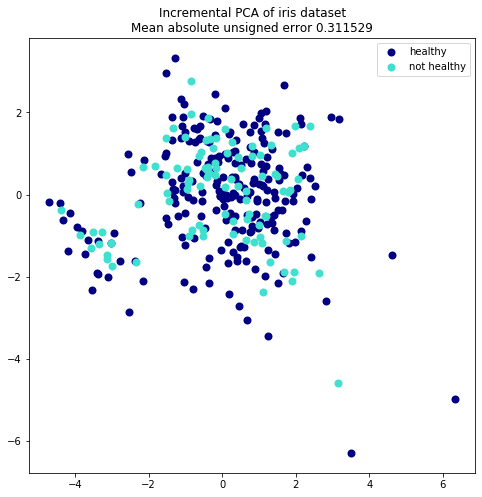

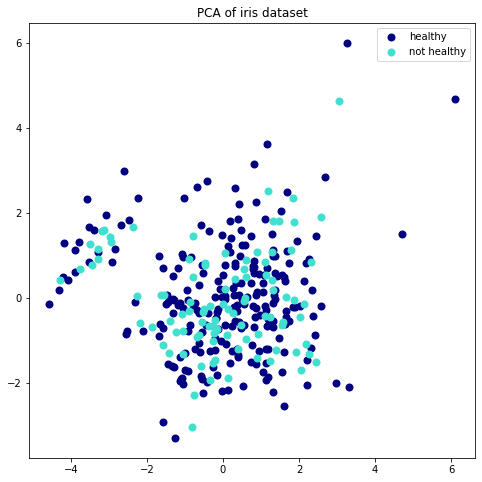

In [51]:
colors = ["navy", "turquoise"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [1, 2], np.array(["healthy", "not healthy"])):
        plt.scatter(
            X_transformed[Y == i, 0],
            X_transformed[Y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show() # again: not concluant

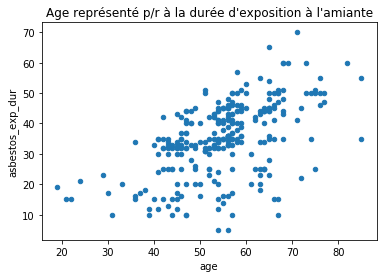

In [57]:
var = df[df["asbestos_exp"] == 1]
var.plot.scatter(title="Age représenté p/r à la durée d'exposition à l'amiante",
         x="age",
         y="asbestos_exp_dur")